In [2]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline


# Helper to print with prettier colors
class c:
    PURPLE = '\033[95m'
    BLUE = '\033[94m'
    CYAN = '\033[96m'
    GREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    END = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    
print(f"Printing {c.PURPLE}with {c.GREEN}pretty {c.FAIL}colors{c.END}{c.BOLD}!{c.END}")
# Loading the data
df = pd.read_csv('./train_dataset.csv/train_dataset.csv')
df.info()


Printing with pretty colors!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570030 entries, 0 to 570029
Data columns (total 55 columns):
 #   Column                                        Non-Null Count   Dtype
---  ------                                        --------------   -----
 0   Elevation (meters)                            570030 non-null  int64
 1    Aspect (azimuth)                             570030 non-null  int64
 2    Slope (degrees)                              570030 non-null  int64
 3    Horizontal_Distance_To_Hydrology (meters)    570030 non-null  int64
 4    Vertical_Distance_To_Hydrology (meters)      570030 non-null  int64
 5    Horizontal_Distance_To_Roadways(meters)      570030 non-null  int64
 6    Hillshade_9am (0-255)                        570030 non-null  int64
 7    Hillshade_Noon (0-255)                       570030 non-null  int64
 8    Hillshade_3pm (0-255)                        570030 non-null  int64
 9    Horizontal_Distance_To_Fire_Points (mete

In [ ]:
# Inspecting the data
df.head()


,Elevation (meters),Aspect (azimuth),Slope (degrees),Horizontal_Distance_To_Hydrology (meters),Vertical_Distance_To_Hydrology (meters),Horizontal_Distance_To_Roadways(meters),Hillshade_9am (0-255),Hillshade_Noon (0-255),Hillshade_3pm (0-255),Horizontal_Distance_To_Fire_Points (meters),...,7756 (32/40),7757 (33/40),7790 (34/40),8703 (35/40),8707 (36/40),8708 (37/40),8771 (38/40),8772 (39/40),8776 (40/40),Forest Cover Type Classes
0,2843,311,19,30,10,2850,167,224,196,2147,...,0,0,0,0,0,0,0,0,0,2
1,3190,358,13,552,57,4287,199,215,153,3355,...,0,0,0,0,0,0,0,0,0,1
2,3288,296,16,67,16,3050,172,233,200,713,...,0,0,0,0,0,0,0,0,0,1
3,3382,8,7,272,19,659,212,227,152,832,...,0,0,0,0,0,0,0,0,1,2
4,3382,258,8,350,47,3561,201,245,182,2305,...,0,0,0,0,0,0,1,0,0,7


In [3]:
# Check for missing values
nan_values_per_feature = df.isnull().sum()
nan_total = sum(list(df.isnull().sum()))

print(f"The dataset length: \t\t{c.BLUE}{len(df)}{c.END}")
print(f"Total number of missing values: {c.BOLD}{nan_total}{c.END}\n")

print(f"{c.BOLD}Printing how many entries in each column contain no NaN values{c.END}:")
print(df.describe)

The dataset length: 		570030
Total number of missing values: 0

Printing how many entries in each column contain no NaN values:
<bound method NDFrame.describe of         Elevation (meters)   Aspect (azimuth)   Slope (degrees)  \
0                     2843                311                19   
1                     3190                358                13   
2                     3288                296                16   
3                     3382                  8                 7   
4                     3382                258                 8   
...                    ...                ...               ...   
570025                3182                 70                13   
570026                3172                156                29   
570027                3153                287                17   
570028                3065                348                21   
570029                3021                 26                16   

         Horizontal_Distance_To_H

In [4]:
print("List all attributes in the dataset and count how many entries of each kind\n")
for col in df.columns:
    print(f"{c.BOLD}{col}:{c.END}")
    print(f"{df[col].value_counts()}")
    print()

List all attributes in the dataset and count how many entries of each kind

Elevation (meters):
2968    1651
2962    1644
2991    1642
2972    1635
2975    1632
        ... 
1863       1
1912       1
3669       1
1884       1
3713       1
Name: Elevation (meters), Length: 1978, dtype: int64

 Aspect (azimuth):
45     6172
0      4825
90     4606
135    3767
63     3616
       ... 
269     616
244     574
224     499
226     492
360      50
Name:  Aspect (azimuth), Length: 361, dtype: int64

 Slope (degrees):
10    33155
11    33148
12    32599
13    31813
9     31447
      ...  
60        2
64        1
63        1
58        1
66        1
Name:  Slope (degrees), Length: 66, dtype: int64

 Horizontal_Distance_To_Hydrology (meters):
30      33537
0       24135
150     20425
60      18815
67      14901
        ...  
1317        1
1358        1
1329        1
1359        1
1240        1
Name:  Horizontal_Distance_To_Hydrology (meters), Length: 551, dtype: int64

 Vertical_Distance_To_Hydrolo

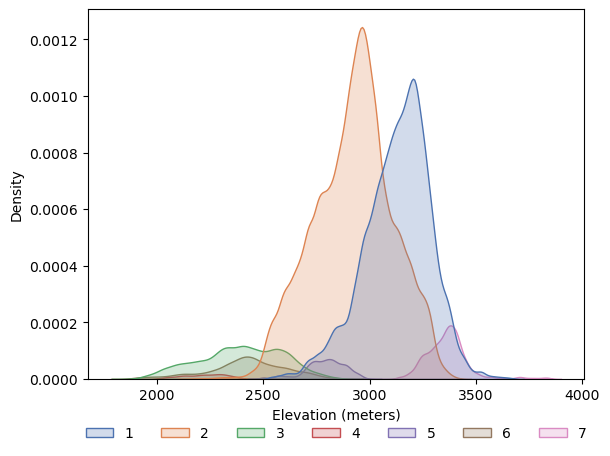

In [5]:
labels = df.columns[-1]
data = df[[df.columns[0], labels]]

ax = sns.kdeplot(df, x=df.columns[0], fill=True, hue=labels, palette='deep')
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, -.2), ncol=7, title=None, frameon=False,
)
plt.show()

In [6]:
from sklearn.linear_model import LogisticRegression as lreg
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


data = df[df.columns[:-1]]
data = StandardScaler(copy=True).fit(data).transform(data)


target = df[df.columns[-1]]

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.4)

lin_reg = lreg().fit(X_train, y_train)
print(lin_reg.score(X_test, y_test))

0.7245802852481449


c:\Users\axelo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
